# Tugas 4.2 : Melakukan Ringkasan pada Berita

Pada Tugas 4.2 ini diminta untuk melakukan proses pembuatan struktur graph untuk mencari cossine similarity untuk mencari keterikatan hubungan antar kalimat dan melakukan ringkasan pada satu berita.

Dibuat Oleh:

*   Nama : Sabil Ahmad Hidayat
*   NIM : 220411100058
*   Kelas : PPW A

Link Code : https://colab.research.google.com/drive/1KujztpkOTx1iP2EoI9l8nwOgqTk5ki9v?usp=sharing

Link Github : https://github.com/meinhere/ppw/tree/master/publish/tugas-4

## Import Library

In [1]:
!pip install -q Sastrawi


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# alat untuk crawling
from urllib.request import urlopen
from bs4 import BeautifulSoup

# library dasar
import pandas as pd
import numpy as np

# preprocessing
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import sent_tokenize

# library untuk centrality
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# library untuk plot
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

## Prepare Data

### Crawl Data

Melakukan crawl data untuk satu berita online yang akan dilakukan proses summarization. Berita diambil pada website KOMPAS.com

In [ ]:
# URL dari halaman yang akan di-crawl
url = 'https://money.kompas.com/read/2024/10/10/071000426/sebut-kondisi-ekonomi-ri-positif-prabowo--kita-sering-kurang-bersyukur-'

html = urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser')

div = soup.find("div", {"class": "read__content"})
paragraf = div.find_all("p")

### Create Dataframe

Dimasukkan ke dalam dataframe dengan memecah beberapa kalimat menjadi kolom.

In [ ]:
content = ''
for p in paragraf:
    content += p.text

sentences = sent_tokenize(content)
df = pd.DataFrame([sentences], columns=['Sentence ' + str(i) for i in range(1, len(sentences) + 1)])
df

,Sentence 1,Sentence 2,Sentence 3,Sentence 4,Sentence 5,Sentence 6,Sentence 7,Sentence 8,Sentence 9,Sentence 10,Sentence 11,Sentence 12,Sentence 13
0,"JAKARTA, KOMPAS.com - Presiden terpilih Prabow...","Menteri Pertahanan itu bilang, laju pertumbuha...","Data teranyar menunjukkan, pertumbuhan ekonomi...",Seiring dengan pertumbuhan ekonomi yang stabil...,Hal itu menjadikan Indonesia sebagai negara de...,"""Kita sering kurang bersyukur, kurang terima k...",Baca juga: Faisal Basri: Utang Pemerintah Berp...,"Prabowo mencontohkan Perancis, dengan rasio ut...","""Enggak tahu kapan mereka akan bayar utang itu...",Baca juga: Prabowo Berencana Turunkan Tarif PP...,"Menurutnya, perlu kehati-hatian dari berbagai ...","""Untuk itu, dibutuhkan semangat kebersamaan.","Untuk itu, perlu semangat kolaborasi,"" ucap Pr..."


### Membuat VSM yang berisi TF-IDF

Dilakukan proses perhitungan nilai TF-IDF pada setiap term di semua dokumen sehingga membentuk sebuah VSM (Vector Space Model).

In [ ]:
# Menghitung TF-IDF
vectorizer = TfidfVectorizer()
data_tfidf = vectorizer.fit_transform(sentences)

# Melihat hasil TF-IDF
data_tfidf = pd.DataFrame(data_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
data_tfidf

,000,05,10,110,16,19,2024,48,agar,akan,...,tersendiri,tetap,tinggi,triliun,tunggu,turunkan,ucap,untuk,utang,yang
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108518
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125852
2,0.000000,0.20813,0.000000,0.000000,0.000000,0.000000,0.179484,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.20813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101866
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301871,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.260322,0.000000,0.000000,0.000000,0.000000,0.000000,0.147746
4,0.000000,0.00000,0.000000,0.000000,0.321441,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.00000,0.149991,0.000000,0.000000,0.000000,0.299983,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085128
6,0.168259,0.00000,0.145100,0.000000,0.000000,0.168259,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.145100,0.000000,0.000000,0.000000,0.000000,0.386007,0.082352
7,0.000000,0.00000,0.000000,0.330516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.252748,0.161766
8,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354041,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270738,0.000000
9,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.222073,0.000000,0.00000,0.000000,0.000000,0.222073,0.000000,0.000000,0.000000,0.108690


### Menghitung Cosine Similarity

Dari VSM yang telah dibentuk dilakukan proses pengukuran kedekatan hubungan antar dokumen dengan menggunakan library dari sklearn yaitu **cosine_similariry**.

In [ ]:
# Implementasi cosine similarity
data_cosine = pd.DataFrame(cosine_similarity(data_tfidf))

# Melihat hasil cosine similarity
data_cosine

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.189187,0.099738,0.154320,0.061854,0.050656,0.081324,0.105363,0.000000,0.067697,0.000000,0.000000,0.078429
1,0.189187,1.000000,0.147355,0.127036,0.153172,0.023249,0.213172,0.053777,0.035797,0.116643,0.062663,0.051328,0.073383
2,0.099738,0.147355,1.000000,0.219965,0.076814,0.072660,0.055111,0.089358,0.000000,0.011072,0.032023,0.000000,0.102212
3,0.154320,0.127036,0.219965,1.000000,0.111411,0.027293,0.134767,0.274541,0.000000,0.016059,0.019329,0.000000,0.092432
4,0.061854,0.153172,0.076814,0.111411,1.000000,0.015670,0.036427,0.041776,0.044750,0.053086,0.049458,0.064164,0.032300
5,0.050656,0.023249,0.072660,0.027293,0.015670,1.000000,0.056311,0.032760,0.000000,0.034771,0.040686,0.000000,0.029364
6,0.081324,0.213172,0.055111,0.134767,0.036427,0.056311,1.000000,0.289258,0.104507,0.141612,0.025889,0.000000,0.121305
7,0.105363,0.053777,0.089358,0.274541,0.041776,0.032760,0.289258,1.000000,0.068428,0.066074,0.000000,0.000000,0.095891
8,0.000000,0.035797,0.000000,0.000000,0.044750,0.000000,0.104507,0.068428,1.000000,0.000000,0.000000,0.070671,0.035576
9,0.067697,0.116643,0.011072,0.016059,0.053086,0.034771,0.141612,0.066074,0.000000,1.000000,0.000000,0.000000,0.141356


### Mengubah data ke dalam Matrix Adjacency

Proses konversi dari perhitungan cosine_similarity ke dalam Matrix Adjacency (matriks yang bernilai 0 atau 1). Dengan menetapkan nilai **threshold** sebagai batas jika nilai diatas dari threshold maka akan menjadi nilai 1, jika tidak maka akan menjadi nilai 0.

In [ ]:
threshold = 0.05

data_cossine_binary = data_cosine.map(lambda x: 1 if x > threshold else 0)
data_cossine_binary

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,1,1,1,1,1,1,1,0,1,0,0,1
1,1,1,1,1,1,0,1,1,0,1,1,1,1
2,1,1,1,1,1,1,1,1,0,0,0,0,1
3,1,1,1,1,1,0,1,1,0,0,0,0,1
4,1,1,1,1,1,0,0,0,0,1,0,1,0
5,1,0,1,0,0,1,1,0,0,0,0,0,0
6,1,1,1,1,0,1,1,1,1,1,0,0,1
7,1,1,1,1,0,0,1,1,1,1,0,0,1
8,0,0,0,0,0,0,1,1,1,0,0,1,0
9,1,1,0,0,1,0,1,1,0,1,0,0,1


Dengan begitu, dapat disimpulkan bahwa jika nilai dalam Matrix Adjacency bernilai 1 maka terdapat hubungan keterikatan antar dokumen tersebut.

## Menghitung Centrality

Jika hanya mengandalkan Matrix Adjacency, maka tidak dapat diukur seberapa dekat keterikatan antar dokumen yang bersangkutan. Maka dilakukan proses untuk menghitung **Centrality** pada tiap dokumen, sehingga dapat dilihat dokumen mana yang memiliki kedekatan paling tinggi sampai paling rendah.

### Dalam Bentuk Objek

In [ ]:
# Membuat graf dari data_cossine_binary
graph = nx.from_pandas_adjacency(data_cossine_binary)

# Menghitung degree centrality
degree_centrality = nx.degree_centrality(graph)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graph)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(graph)

# Menghitung eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(graph)

# Menampilkan hasil centrality
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)

Degree Centrality: {0: 0.9166666666666666, 1: 1.0, 2: 0.8333333333333333, 3: 0.75, 4: 0.6666666666666666, 5: 0.41666666666666663, 6: 0.9166666666666666, 7: 0.8333333333333333, 8: 0.41666666666666663, 9: 0.6666666666666666, 10: 0.25, 11: 0.5, 12: 0.8333333333333333}
Betweenness Centrality: {0: 0.05909090909090908, 1: 0.21565656565656566, 2: 0.046464646464646465, 3: 0.008585858585858586, 4: 0.02861952861952862, 5: 0.0, 6: 0.10353535353535354, 7: 0.0505050505050505, 8: 0.011784511784511783, 9: 0.008585858585858586, 10: 0.0, 11: 0.03282828282828283, 12: 0.040404040404040394}
Closeness Centrality: {0: 0.8, 1: 0.8571428571428571, 2: 0.75, 3: 0.7058823529411765, 4: 0.6666666666666666, 5: 0.5217391304347826, 6: 0.8, 7: 0.75, 8: 0.5454545454545454, 9: 0.6666666666666666, 10: 0.48, 11: 0.5714285714285714, 12: 0.75}
Eigenvector Centrality: {0: 0.3621975308493552, 1: 0.3684145635147965, 2: 0.33014469209587743, 3: 0.3133480164447061, 4: 0.2419463349268008, 5: 0.14076563996020863, 6: 0.3465735350339

### Dalam Bentuk Tabel

In [ ]:
# Membuat Dataframe pada setiap centrality
degree_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['degree_centrality'])
betweenness_df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['betweenness_centrality'])
closeness_df = pd.DataFrame.from_dict(closeness_centrality, orient='index', columns=['closeness_centrality'])
eigenvector_df = pd.DataFrame.from_dict(eigenvector_centrality, orient='index', columns=['eigenvector_centrality'])

# Menggabung ke dalam satu Dataframe
centrality_df = pd.concat([degree_df, betweenness_df, closeness_df, eigenvector_df], axis=1)

# Melihat hasil Dataframe
centrality_df

,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality
0,0.916667,0.059091,0.800000,0.362198
1,1.000000,0.215657,0.857143,0.368415
2,0.833333,0.046465,0.750000,0.330145
3,0.750000,0.008586,0.705882,0.313348
4,0.666667,0.028620,0.666667,0.241946
5,0.416667,0.000000,0.521739,0.140766
6,0.916667,0.103535,0.800000,0.346574
7,0.833333,0.050505,0.750000,0.329777
8,0.416667,0.011785,0.545455,0.111010
9,0.666667,0.008586,0.666667,0.268616


## Peringkat Centrality pada Kalimat

Pemeringkatan pada setiap kalimat dengan cara melakukan penjumlahan pada setiap hasil centrality (Degree, Betweness, Closeness, Eigenvector) dan kemudian melakukan total score teratas dari setiap kalimat.

In [ ]:
# Gabungkan semua skor centrality menjadi satu DataFrame
centrality_scores = pd.DataFrame({
    'Degree': degree_centrality,
    'Betweenness': betweenness_centrality,
    'Closeness': closeness_centrality,
    'Eigenvector': eigenvector_centrality
})

# Hitung skor total untuk setiap kalimat (bisa diubah sesuai kebutuhan)
centrality_scores['Total_Score'] = centrality_scores.sum(axis=1)

# Urutkan kalimat berdasarkan skor total
ranked_sentences = centrality_scores.sort_values('Total_Score', ascending=False)

# Tampilkan hasil peringkat kalimat
idx = 1
print("Ranked Sentences:")
for index, row in ranked_sentences.iterrows():
  print(f"Rank {idx} - Sentence {index + 1}: Score = {row['Total_Score']}")
  print(sentences[index])
  print("---")
  idx += 1

Ranked Sentences:
Rank 1 - Sentence 2: Score = 2.4412139863142195
Menteri Pertahanan itu bilang, laju pertumbuhan ekonomi nasional masih lebih baik dibandingkan dengan negara-negara lain di tengah kondisi global yang menantang.
---
Rank 2 - Sentence 7: Score = 2.1667755552359624
Baca juga: Faisal Basri: Utang Pemerintah Berpotensi Tembus Rp 10.000 Triliun di Tahun Pertama Prabowo Lebih lanjut Prabowo bilang, kondisi ekonomi global yang menantang sejak pandemi Covid-19 telah membuat utang banyak negara membengkak dan rasio utang terhadap PDB melonjak.
---
Rank 3 - Sentence 1: Score = 2.137955106606931
JAKARTA, KOMPAS.com - Presiden terpilih Prabowo Subianto menilai, perkembangan kondisi ekonomi Indonesia masih positif, ditandai dengan laju inflasi serta pertumbuhan produk domestik bruto (PDB) yang terjaga.
---
Rank 4 - Sentence 8: Score = 1.9636152432211547
Prabowo mencontohkan Perancis, dengan rasio utang terhadap PDB yang disebut telah mencapai 110 persen.
---
Rank 5 - Sentence 3: Sco

## Summarization

Dari hasil pemeringkatan kemudian memasukkan berapa kalimat yang akan dijadikan summarization. Summarization dilakukan dari peringkat paling atas ke paling bawah sesuai dengan jumlah kaliamt yang diinginkan

In [ ]:
# Tentukan jumlah kalimat yang ingin diambil sebagai ringkasan
num_summary_sentences = 3

# Ambil kalimat-kalimat dengan skor tertinggi sebagai ringkasan
summary_sentences = [sentences[i] for i in ranked_sentences.index[:num_summary_sentences]]

# Gabungkan kalimat-kalimat ringkasan menjadi satu paragraf
summary = " ".join(summary_sentences)

# Tampilkan ringkasan
print("Summary:")
print(summary)

Summary:
Menteri Pertahanan itu bilang, laju pertumbuhan ekonomi nasional masih lebih baik dibandingkan dengan negara-negara lain di tengah kondisi global yang menantang. Baca juga: Faisal Basri: Utang Pemerintah Berpotensi Tembus Rp 10.000 Triliun di Tahun Pertama Prabowo Lebih lanjut Prabowo bilang, kondisi ekonomi global yang menantang sejak pandemi Covid-19 telah membuat utang banyak negara membengkak dan rasio utang terhadap PDB melonjak. JAKARTA, KOMPAS.com - Presiden terpilih Prabowo Subianto menilai, perkembangan kondisi ekonomi Indonesia masih positif, ditandai dengan laju inflasi serta pertumbuhan produk domestik bruto (PDB) yang terjaga.


## Plotting

### Degree Centrality

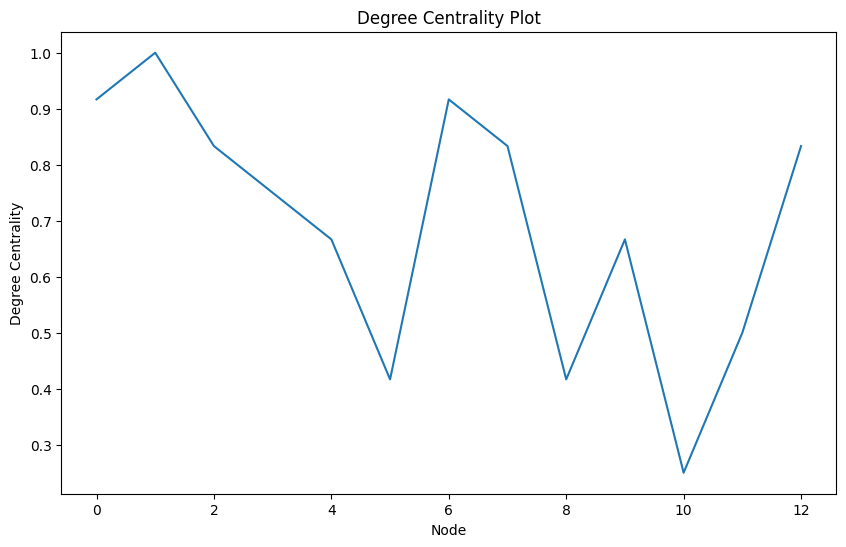

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(list(degree_centrality.values()))
plt.xlabel("Node")
plt.ylabel("Degree Centrality")
plt.title("Degree Centrality Plot")
plt.show()

### Betweness Centrality

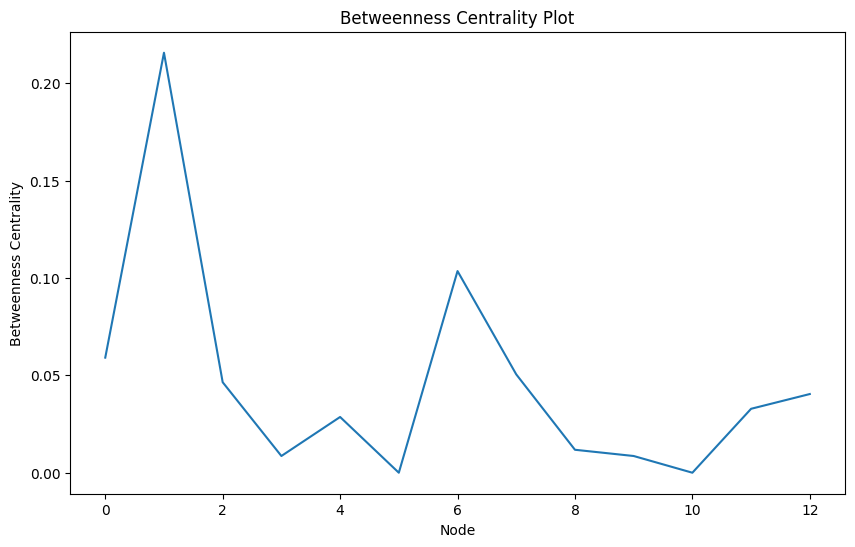

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(list(betweenness_centrality.values()))
plt.xlabel("Node")
plt.ylabel("Betweenness Centrality")
plt.title("Betweenness Centrality Plot")
plt.show()

### Closeness Centrality

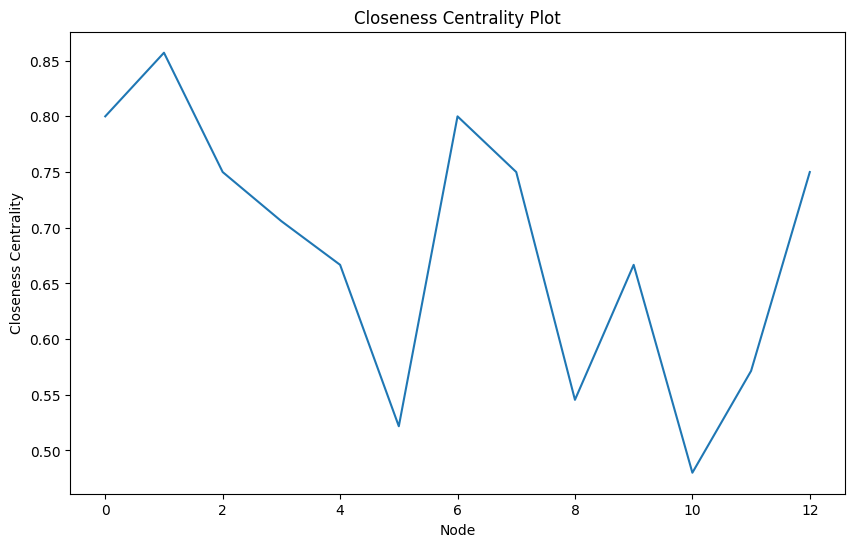

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(list(closeness_centrality.values()))
plt.xlabel("Node")
plt.ylabel("Closeness Centrality")
plt.title("Closeness Centrality Plot")
plt.show()

### Eigenvector Centrality

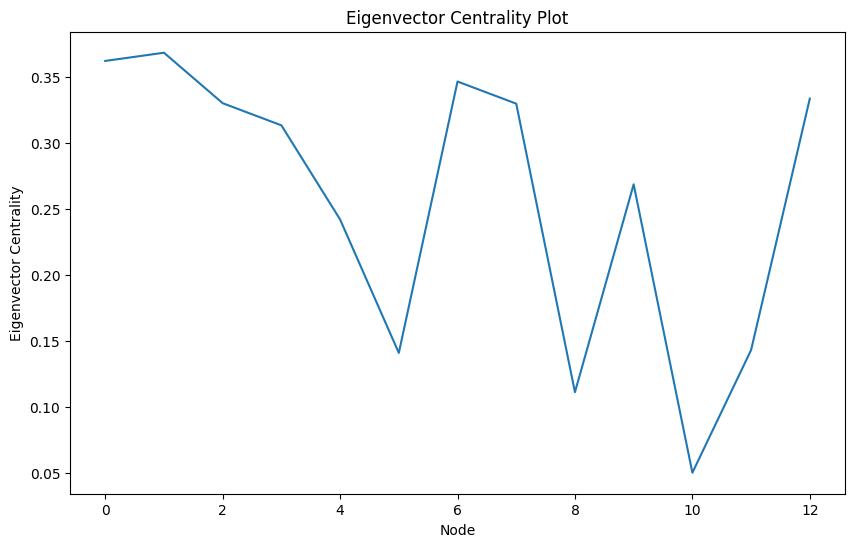

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(list(eigenvector_centrality.values()))
plt.xlabel("Node")
plt.ylabel("Eigenvector Centrality")
plt.title("Eigenvector Centrality Plot")
plt.show()

### Graph

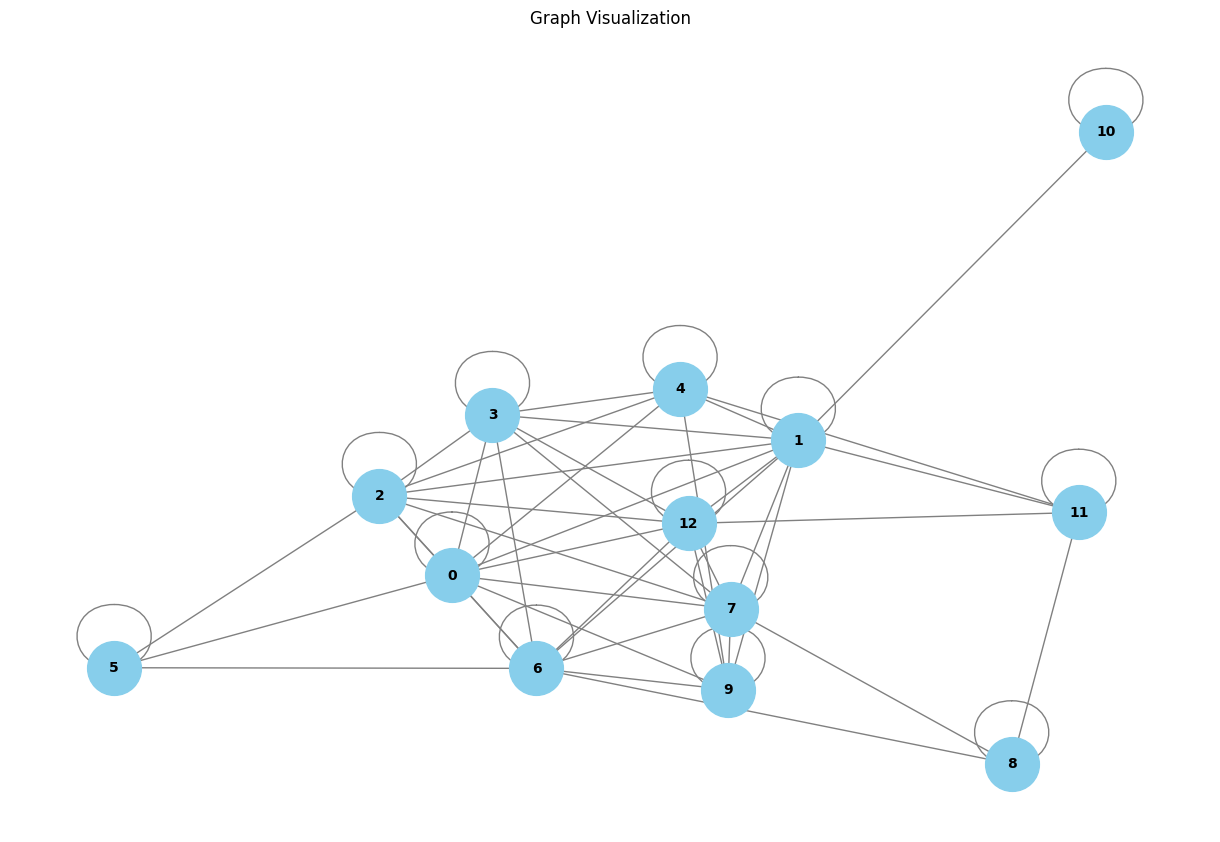

In [ ]:
plt.figure(figsize=(12, 8))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Graph Visualization")
plt.show()